# Project 1: Predicting Titanic Survivors

In this project I will make a prediction which passengers survived the Titanic shipwreck. For this prediction I will use an ensamble of different machine learning algorithms. The goal of this project is to show how I approach a data project and to show some of my skills in my toolbox. 



In [1]:
import os
import pandas as pd
import numpy as np
import sys
import matplotlib

In [2]:
os.getcwd()

'C:\\Users\\gvang\\Documents'

In [3]:
os.chdir(r"C:\Users\gvang\OneDrive\Documenten\Python Scripts\Titanic survivors")

In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
print("Train Shape:", train.shape)
print("Test Shape:", test.shape)

Train Shape: (891, 12)
Test Shape: (418, 11)


Extracting the titles of the Passengers might provide valuable information.

# Project planning 
Now the data is loaded, I like to plan the steps I have to take to get to the objective: Predicting Titanic survivors. I will use the train set to predict the survival of the passengers in the test set. 

Steps: 
- Getting an understand of the data 
    - Which variables are in the dataset?
    - Datatypes 
    - Missings
    - Some exploratory statistics (mean, std, etc.)
    - Some exploratory graphs (histograms, boxplots)
    - Explore some interesting relationships with survival in the dataset
        - Women and children first?
        - Differences between tickettypes 
        - Differences in cabine location

- Feature engineering 
    - Binning
    - Mapping

- Model Building
    - Naive Bayes 
    - Decision Tree
    - Logistic regression
    - K Nearest Neighbor 
    - Random Forest 
    - Support Vector Classifier 
    - Xtreme Gradient Boosting 

- Model Tuning 
    - Trying different parameters for the models 

- Model Comparison
        


# Getting an understanding of the data

In [8]:
# look at variables and data types
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


I will approach the exploration of the numerical columns differently, compared to the categorical columns. For each type different aspects are importent in the understanding of the variable. 

# Identifying the missing values

In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In the trainset missings in:
- Age (177)
- Cabin (687)
- Embarked (2)

In the testset missings in:
- Age (86)
- Fare (1)
- Cabin (327)

In [11]:
test["Survived"] = ""
test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,


# Exploratory Data Analysis

Firstly I'll provide some exploratory statistics and graphs for the numerical columns. Categorical columns follow afterwards.

## Numerical variables

In [44]:
# Load libraries 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [13]:
train.describe().round(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


In [73]:
test.describe().round(2)

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.00,418.00,332.00,418.00,418.00,417.00
mean,1100.50,2.27,30.27,0.45,0.39,35.63
std,120.81,0.84,14.18,0.90,0.98,55.91
min,892.00,1.00,0.17,0.00,0.00,0.00
25%,996.25,1.00,21.00,0.00,0.00,7.90
50%,1100.50,3.00,27.00,0.00,0.00,14.45
75%,1204.75,3.00,39.00,1.00,0.00,31.50
max,1309.00,3.00,76.00,8.00,9.00,512.33


The distribution of Fare in both train and testset looks a bit awkward. Some people were on the Titanic for free, 75% paid up to 31 pound and some people paid up to 512 pounds. It might be necessary to further look into the characteristics of the Fare variable. 

In [72]:
train[train["Fare"]>500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [70]:
test[test['Fare']>500]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
343,1235,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C,


Those Passengers all have the same Ticket number. This might be a grouped Fare. However, this does not seem an error. So I will not exclude the data. 

In [71]:
train[train["Fare"]==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


In [74]:
test[test['Fare']==0]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
266,1158,1,"Chisholm, Mr. Roderick Robert Crispin",male,NaN,0,0,112051,0.0,NaN,S,
372,1264,1,"Ismay, Mr. Joseph Bruce",male,49.0,0,0,112058,0.0,B52 B54 B56,S,


It could also be possible that people received their tickets for free. Therefore, I see no reason to exclude these cases. 

In [15]:
# make split between numerical an categorical variables 
df_num = train[["Age", "SibSp", "Parch", "Fare"]]
df_cat = train[["Survived", "Pclass", "Sex", "Ticket", "Cabin", "Embarked"]]

C:\Users\gvang\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\gvang\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


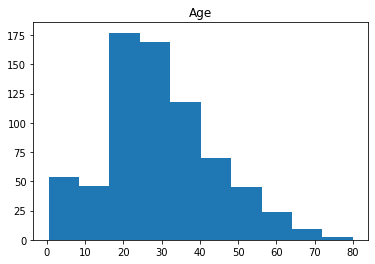

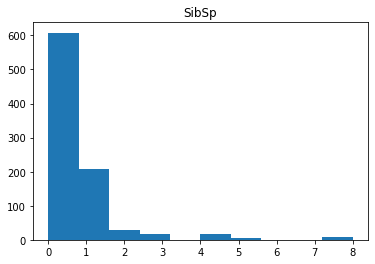

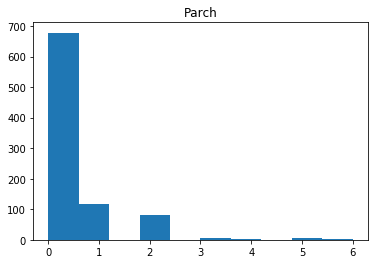

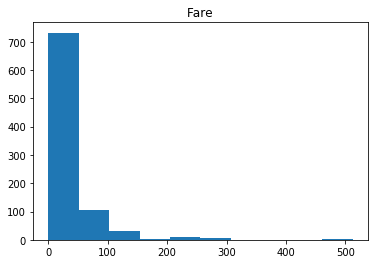

In [16]:
# Show histograms of numerical variables 
for i in df_num.columns: 
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


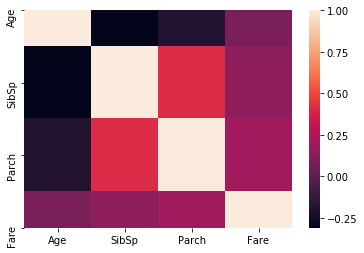

In [17]:
# Correlation 
print(df_num.corr())
sns.heatmap(df_num.corr())

In [39]:
pd.pivot_table(train, index = "Survived", values = df_num)

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


### Insights:
Passengers that survived:
    - were younger
    - paid more 
    - have more parents/children
    - have less sibling/spouses

## Categorical variables

Categorical variables: 
   - Survived
   - Pclass
   - Sex
   - Ticket 
   - Cabin
   - Embarked

In [38]:
for i in df_cat:
    cat_counts = df_cat[i].value_counts()
    print(i) 
    print(cat_counts)
    

Survived
0    549
1    342
Name: Survived, dtype: int64
Pclass
3    491
1    216
2    184
Name: Pclass, dtype: int64
Sex
male      577
female    314
Name: Sex, dtype: int64
Ticket
347082               7
CA. 2343             7
1601                 7
3101295              6
CA 2144              6
                    ..
111427               1
112058               1
237565               1
111428               1
STON/O 2. 3101280    1
Name: Ticket, Length: 681, dtype: int64
Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F33            3
E101           3
              ..
C103           1
F38            1
C7             1
E36            1
C50            1
Name: Cabin, Length: 147, dtype: int64
Embarked
S    644
C    168
Q     77
Name: Embarked, dtype: int64


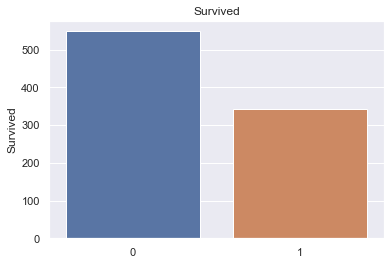

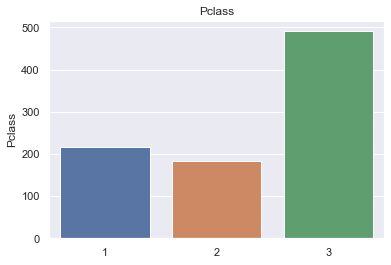

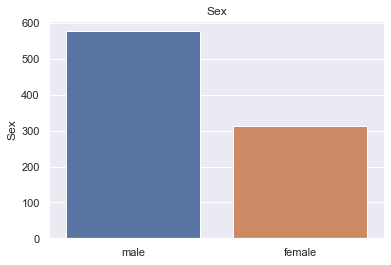

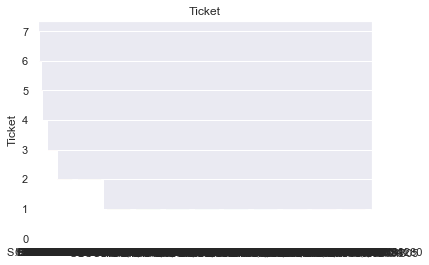

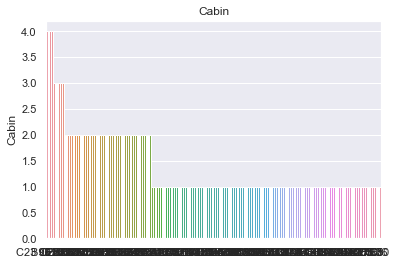

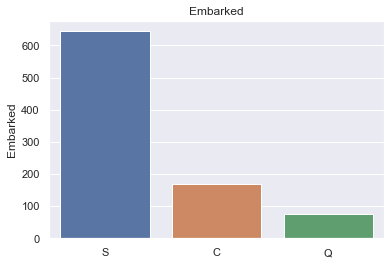

In [53]:
for i in df_cat: 
    sns.barplot(df_cat[i].value_counts().index, df_cat[i].value_counts())
    plt.title(i)
    plt.show()

Survived, Pclass, Sex and Embarked are usefull. For Ticket and Cabin feature engineering might be a solution to make them usefull. 

In [65]:
print(pd.pivot_table(train, index = 'Survived', columns = 'Pclass', values = 'PassengerId' ,aggfunc ='count'))
print()
print(pd.pivot_table(train, index = 'Survived', columns = 'Sex', values = 'PassengerId', aggfunc = 'count'))
print()
print(pd.pivot_table(train, index = 'Survived', columns = 'Embarked', values = 'PassengerId', aggfunc = 'count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


### Insights:
- Passengers in Class 1 had the highest chance to survive, Passengers in Class 3 the lowest. 
- Female passengers had a higher chance to survive ('Women and children first').
- Passengers that embarked from Cherbourg were most likely to survive, Passengers from Southampton least likely to survive. 

# Feature Engineering

## Mapping 
The following variables could use some mapping:
- Passenger title
- Cabin
- Ticket

### Passenger title 

In [87]:
# Extract the title of the passengers 
def extract_title(df):
    Title = df["Name"].apply(lambda Name: Name.split(',')[1].split('.')[0].strip())
    return Title

In [89]:
# Count title instances for train data
train['Title'] = extract_title(train)
train['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
Lady              1
Sir               1
Mme               1
Capt              1
Ms                1
Don               1
Jonkheer          1
the Countess      1
Name: Title, dtype: int64

In [90]:
# Count titles for test data
test['Title'] = extract_title(test)
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dona        1
Ms          1
Dr          1
Name: Title, dtype: int64

Because many titles occur a few times, I'll map them in categories.

In [91]:
def map_title(df):
    title_category = {
    'Mr': 'Mr',
    'Miss': 'Miss',
    'Mrs': 'Mrs',
    'Master': 'Master',
    'Dr': 'Work',
    'Rev': 'Work',
    'Major': 'Work',
    'Col': 'Work',
    'Mlle': 'Miss',
    'Lady': 'Royalty',
    'Sir': 'Royalty',
    'Mme': 'Mrs',
    'Capt': 'Work',
    'Ms': 'Mrs',
    'Don': 'Royalty',
    'Jonkheer': 'Royalty',
    'the Countess': 'Royalty',
    'Dona': 'Royalty'
    }
    title_cat = df['Title'].map(title_category)
    return title_cat

In [92]:
train['Title'] = map_title(train)
train['Title'].value_counts()

Mr         517
Miss       184
Mrs        127
Master      40
Work        18
Royalty      5
Name: Title, dtype: int64

In [93]:
test['Title'] = map_title(test)
test['Title'].value_counts()

Mr         240
Miss        78
Mrs         73
Master      21
Work         5
Royalty      1
Name: Title, dtype: int64

### Cabin

In [102]:
train[train['Cabin'].notnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,Miss
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,Miss
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S,Mr
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,Mr
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,Mr
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,Mrs
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,Mrs


In [99]:
train['Pclass'][train["Cabin"].notnull()].value_counts()

1    176
2     16
3     12
Name: Pclass, dtype: int64

The Cabin variable consists of a letter followed by a number. The majority of passengers with a cabin do have a first class ticket. First, I will extract the letter from the Cabin code, this refers to the Deck. 

In [127]:
# Get number of cabins 
train['Cabin_count'] = train['Cabin'].apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
train['Cabin_count'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: Cabin_count, dtype: int64

In [128]:
pd.pivot_table(train, index = 'Survived', 
               columns = 'Cabin_count', 
               values = 'Ticket', 
               aggfunc = 'count')

Cabin_count,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [131]:
# Creating categories based on cabin letters (n = null)
def extract_deck(df):
    Deck = df['Cabin'].apply(lambda x: str(x)[0])
    return Deck


In [132]:
train['Deck'] = extract_deck(train)
train['Deck'].value_counts()

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Deck, dtype: int64

In [133]:
test['Deck'] = extract_deck(test)
test['Deck'].value_counts()

n    327
C     35
B     18
D     13
E      9
F      8
A      7
G      1
Name: Deck, dtype: int64

In [134]:
pd.pivot_table(train, index = 'Survived', 
               columns = 'Deck', 
               values = 'Ticket', 
               aggfunc = 'count')


Deck,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


### Ticket

In [145]:
train['Ticket_pre'] = train["Ticket"].split(' ')[0]

AttributeError: 'Series' object has no attribute 'split'